In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.weightstats import ttest_ind

data = pd.read_csv('calcium.txt', sep='\s+')
data.head()

<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\mathi\AppData\Local\Temp\ipykernel_3008\1937269784.py:9: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('calcium.txt', sep='\s+')


,Treatment,Begin,End,Decrease
0,Calcium,107,100,7
1,Calcium,110,114,-4
2,Calcium,123,105,18
3,Calcium,129,112,17
4,Calcium,112,115,-3


# Exercise 2

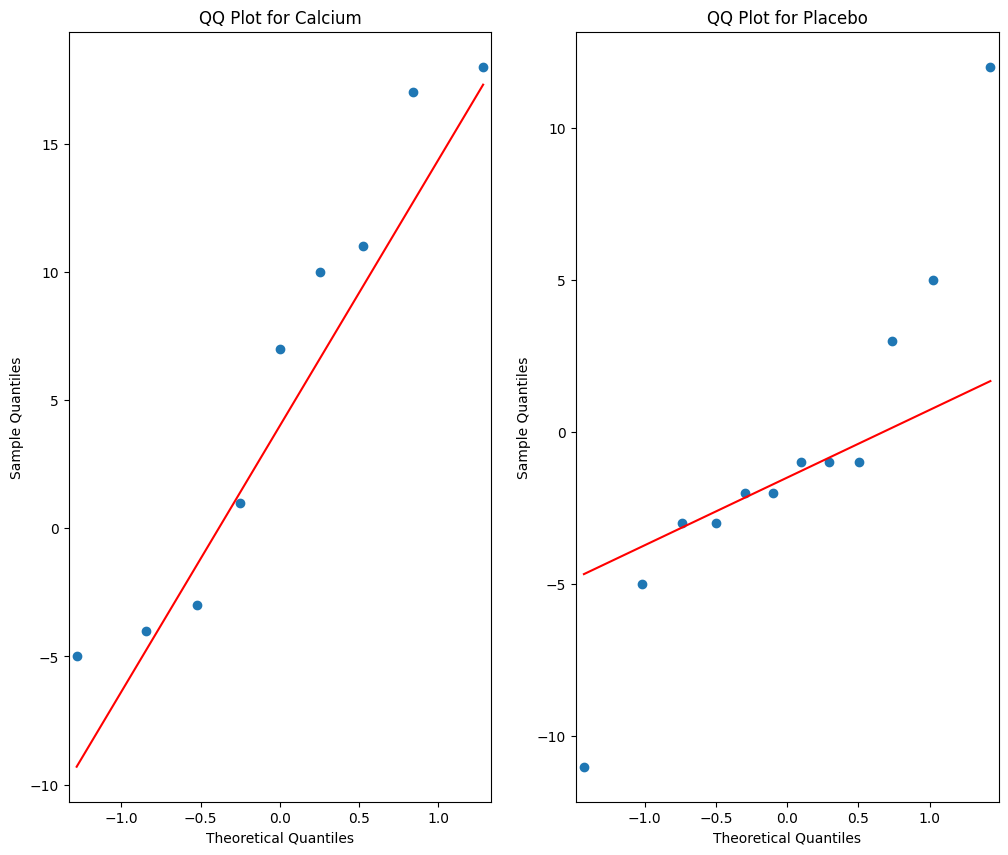

In [15]:
# plt.figure(figsize=(12, 6))
fig, ax = plt.subplots(1, 2, figsize=(12, 10))
calcium = data['Decrease'].iloc[:9]
sm.qqplot(calcium, line='q', marker='o', ax=ax[0])
ax[0].set_title('QQ Plot for Calcium')

placebo = data['Decrease'].iloc[9:]
sm.qqplot(placebo, line='q', marker='o', ax=ax[1])
ax[1].set_title('QQ Plot for Placebo')
plt.show()

Only the calcium can be considered normally distributed

# Exercise 3

In [20]:
var1 = np.var(calcium, ddof=1)
var2 = np.var(placebo, ddof=1)

f_value = var1 / var2

# Calculate the degrees of freedom
df1 = len(calcium) - 1
df2 = len(placebo) - 1
 
# Calculate the p-value
p_value = stats.f.cdf(f_value, df1, df2)
 
# Print the results
print('Degree of freedom 1:',df1)
print('Degree of freedom 2:',df2)
print("F-statistic:", f_value)
print("p-value:", p_value)

Degree of freedom 1: 8
Degree of freedom 2: 11
F-statistic: 2.5159245888487765
p-value: 0.9210049740484921


They have equal variance.

# Exercise 4

<Figure size 800x600 with 0 Axes>

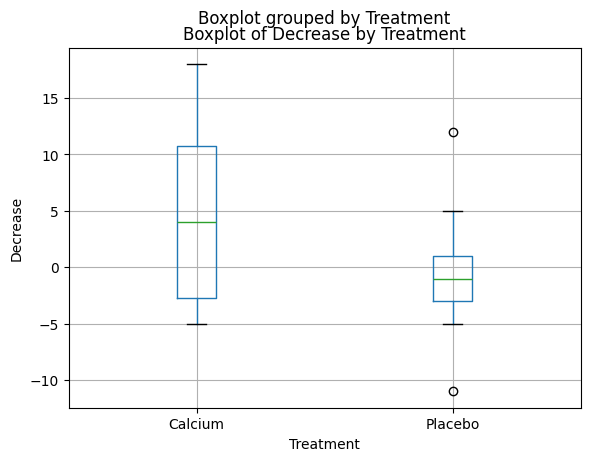

In [22]:
plt.figure(figsize=(8, 6))
data.boxplot(column='Decrease', by='Treatment')
plt.title('Boxplot of Decrease by Treatment')
plt.xlabel('Treatment')
plt.ylabel('Decrease')
plt.show()

# Exercise 5

In [24]:
stats.ttest_ind(a=calcium, b=placebo, equal_var=True)

TtestResult(statistic=2.0614577750721104, pvalue=0.053211397581845364, df=19.0)

We cannot reject the null hypothesis that the calcium pills have an effect on blood pressure.

# Exercise 6

Wilcoxon rank-sum test since they are independent.